In [ ]:
import pandas as pd
def wrangle(path):
  df=pd.read_csv(path)
  df[["text","sentiment","source","date_time","userid","location","confidence_score"]]=(df["Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"].str.split(",",expand=True))
  #columns
  df.drop(columns=["Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"],inplace=True)
  #df["text"]=df["text"].str.replace('""','',regex=True)
  #df[["date","time"]]=df["date_time"].str.split(" ",expand=True)
  return df

In [ ]:
ds=wrangle(r"/content/sentiment-analysis.csv")

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              96 non-null     object
 1   sentiment         96 non-null     object
 2   source            96 non-null     object
 3   date_time         96 non-null     object
 4   userid            96 non-null     object
 5   location          96 non-null     object
 6   confidence_score  96 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


In [ ]:
ds.head(5)

,text,sentiment,source,date_time,userid,location,confidence_score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [ ]:
db=ds["text"]

In [ ]:
db.info()

<class 'pandas.core.series.Series'>
RangeIndex: 98 entries, 0 to 97
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
96 non-null     object
dtypes: object(1)
memory usage: 912.0+ bytes


In [ ]:
db.head(5)

0                               "I love this product!"
1                          "The service was terrible."
2                             "This movie is amazing!"
3    "I'm so disappointed with their customer suppo...
4                 "Just had the best meal of my life!"
Name: text, dtype: object

In [ ]:
db=db.str.replace('"',' ')

In [ ]:
db.head()

0                                I love this product! 
1                           The service was terrible. 
2                              This movie is amazing! 
3     I'm so disappointed with their customer suppo...
4                  Just had the best meal of my life! 
Name: text, dtype: object

In [ ]:
db.describe()

count                         96
unique                        75
top        I love this product! 
freq                           2
Name: text, dtype: object

In [ ]:
db.unique()

array([' I love this product! ', ' The service was terrible. ',
       ' This movie is amazing! ',
       " I'm so disappointed with their customer support. ",
       ' Just had the best meal of my life! ',
       ' The quality of this product is subpar. ',
       " I can't stop listening to this song. It's incredible! ",
       ' Their website is so user-friendly. Love it! ',
       ' I loved the movie! It was fantastic! ',
       ' The customer service was terrible. ',
       ' This book made me feel inspired. Highly recommended! ',
       " I'm extremely disappointed with their product quality. ",
       " Just had the most amazing vacation! I can't wait to go back. ",
       ' The food at this restaurant was awful. Never going back again! ',
       " I can't stop listening to this song. It's my new favorite! ",
       ' Their website is so confusing and poorly designed. ',
       ' I had an incredible experience at the theme park. So much fun! ',
       ' The product arrived damage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              96 non-null     object
 1   sentiment         96 non-null     object
 2   source            96 non-null     object
 3   date_time         96 non-null     object
 4   userid            96 non-null     object
 5   location          96 non-null     object
 6   confidence_score  96 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB
                                               text  sentiment         source  \
0                              I love this product!   Positive        Twitter   
1                         The service was terrible.   Negative   Yelp Reviews   
2                            This movie is amazing!   Positive           IMDb   
3  I'm so disappointed with their customer support.   Negative   Online Forum   
4                Just had the best meal

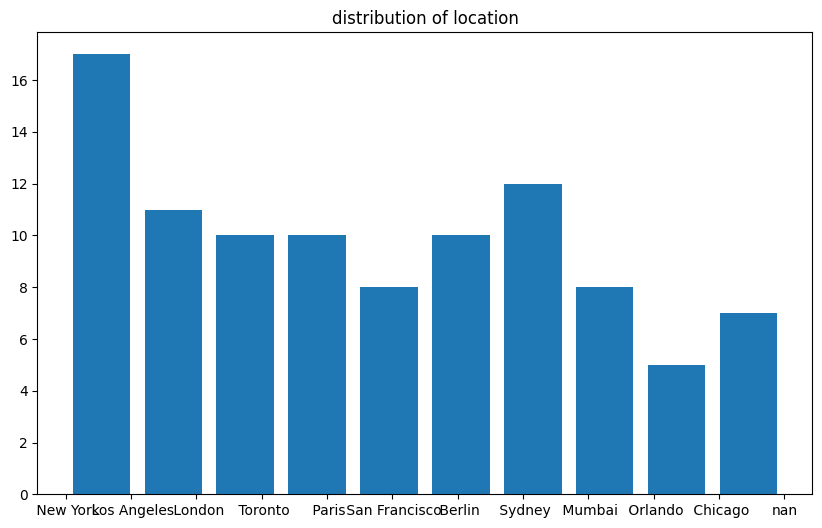

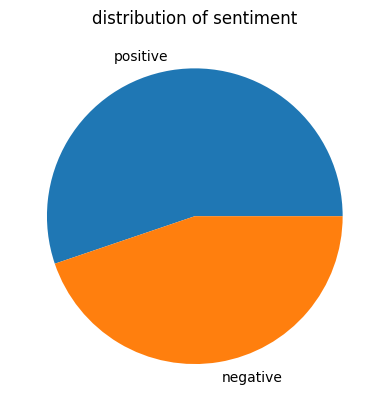

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

#data preparation
def wrangle(path):
  df=pd.read_csv(path)
  df[["text","sentiment","source","date_time","userid","location","confidence_score"]]=(df["Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"].str.split(",",expand=True))
  df.drop(columns=["Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"],inplace = True)
  #df[["date","time"]]=df["date_time"].str.split(" ",expand=True)
  return df
ds = wrangle(r"/content/sentiment-analysis.csv")
ds.info()
ds["text"]=ds["text"].str.replace('"','',regex=True)
print(ds.head(5))

ds["location"] = ds["location"].astype(str)
#data visualization
#bar chart
plt.figure(figsize=(10, 6))
plt.hist(ds["location"],bins=10,rwidth=0.8)
plt.title("distribution of location")
plt.show()

#pie chart
p=ds["sentiment"].value_counts()
plt.pie(p,labels=["positive","negative"])
plt.title("distribution of sentiment")
plt.show()

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


nltk.download('punkt')
nltk.download('stopwords')

def wrangle(path):
    df = pd.read_csv(path)
    df.dropna(inplace=True)
    df = df.iloc[:, 0].str.split(', ', expand=True)
    df.columns = ["text", "sentiment", "source", "date_time", "userid", "location", "confidence_score"]
    df[['date', 'time']] = df['date_time'].str.split(' ', expand=True)
    df.drop(columns=['date_time'], inplace=True)
    return df

ds = wrangle(r"/content/sentiment-analysis.csv")
text_data = ds["text"]
print(text_data.head(10))
tokens = [word_tokenize(text.lower()) for text in text_data]
stop_words = set(stopwords.words('english'))
filtered_tokens = [[word for word in token if word not in stop_words] for token in tokens]

all_words = [word for sublist in filtered_tokens for word in sublist]
word_freq = Counter(all_words)

print("Most common words:")
print(word_freq.most_common(10))

0                               "I love this product!"
1                          "The service was terrible."
2                             "This movie is amazing!"
3    "I'm so disappointed with their customer suppo...
4                 "Just had the best meal of my life!"
5             "The quality of this product is subpar."
6    "I can't stop listening to this song. It's inc...
7        "Their website is so user-friendly. Love it!"
8               "I loved the movie! It was fantastic!"
9                 "The customer service was terrible."
Name: text, dtype: object
Most common words:
[('.', 119), ('``', 96), ("''", 96), ('!', 51), ('customer', 15), ('product', 13), ('service', 13), ("'m", 12), ('terrible', 11), ('website', 11)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

sentiment_scores = text_data.apply(analyze_sentiment)
ds['sentiment_score'] = sentiment_scores
print(ds.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text sentiment        source  \
0                             "I love this product!"  Positive       Twitter   
1                        "The service was terrible."  Negative  Yelp Reviews   
2                           "This movie is amazing!"  Positive          IMDb   
3  "I'm so disappointed with their customer suppo...  Negative  Online Forum   
4               "Just had the best meal of my life!"  Positive   TripAdvisor   

        userid     location confidence_score        date      time  \
0     @user123     New York             0.85  2023-06-15  09:23:14   
1      user456  Los Angeles             0.65  2023-06-15  11:45:32   
2  moviefan789       London             0.92  2023-06-15  14:10:22   
3   forumuser1      Toronto             0.78  2023-06-15  17:35:11   
4     foodie22        Paris             0.88  2023-06-16  08:50:59   

   sentiment_score  
0           0.6696  
1           0.0000  
2           0.0000  
3          -0.

In [ ]:
def map_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

predicted_sentiment = ds['sentiment_score'].apply(map_sentiment)

comparison = pd.DataFrame({
    'Actual_Sentiment': ds['sentiment'],
    'Predicted_Sentiment': predicted_sentiment
})


print(comparison.head(20))

   Actual_Sentiment Predicted_Sentiment
0          Positive            Positive
1          Negative             Neutral
2          Positive             Neutral
3          Negative            Negative
4          Positive            Positive
5          Negative             Neutral
6          Positive            Positive
7          Positive            Positive
8          Positive            Positive
9          Negative             Neutral
10         Positive            Positive
11         Negative            Negative
12         Positive            Positive
13         Negative            Negative
14         Positive            Positive
15         Negative            Negative
16         Positive             Neutral
17         Negative            Negative
18         Positive            Positive
19         Negative            Negative


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy = accuracy_score(comparison['Actual_Sentiment'], comparison['Predicted_Sentiment'])
print("Accuracy:", accuracy)

Accuracy: 0.7708333333333334


In [ ]:
pres = precision_score(comparison['Actual_Sentiment'], comparison['Predicted_Sentiment'],average='weighted')
print("Precision:",pres)

Precision: 0.9743217054263565


In [ ]:
f = f1_score(comparison['Actual_Sentiment'], comparison['Predicted_Sentiment'],average='weighted')
print("F1:",f)

F1: 0.8605514437134504


In [ ]:
rec = recall_score(comparison['Actual_Sentiment'], comparison['Predicted_Sentiment'],average='micro')
print("Recall:",rec)

Recall: 0.7708333333333334


In [ ]:
!pip install emoji
import emoji
sa=ds['sentiment_score']


for i in sa.head(10):
  if i >0.9:
    print(emoji.emojize("\U0001F602"))
  elif i>0.6 and i <0.9:
    print(emoji.emojize("\U0001F601"))
  elif i>0.4 and i <0.6:
    print(emoji.emojize("\U0001F60A"))
  elif i>0.1 and i <0.4:
    print(emoji.emojize("\U0001F642"))
  elif i>-0.1 and i <0.1:
    print(emoji.emojize("\U0001F610"))
  elif i>-0.4 and i <-0.1:
    print(emoji.emojize("\U0001F641"))
  elif i>-0.6 and i <-0.4:
    print(emoji.emojize("\U0001F61F"))
  elif i>-0.9 and i <-0.6:
    print(emoji.emojize("\U0001F622"))
  else:
    print(emoji.emojize("\U0001F62D"))

#positive hands up 64F or thumbs up 44D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 3.4 MB/s eta 0:00:00
😁
😐
😐
😟
😁
😐
🙂
😁
😁
😐


In [ ]:
ds.head(10)

,text,sentiment,source,userid,location,confidence_score,date,time,sentiment_score
0,"""I love this product!""",Positive,Twitter,@user123,New York,0.85,2023-06-15,09:23:14,0.6696
1,"""The service was terrible.""",Negative,Yelp Reviews,user456,Los Angeles,0.65,2023-06-15,11:45:32,0.0000
2,"""This movie is amazing!""",Positive,IMDb,moviefan789,London,0.92,2023-06-15,14:10:22,0.0000
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,forumuser1,Toronto,0.78,2023-06-15,17:35:11,-0.5256
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,foodie22,Paris,0.88,2023-06-16,08:50:59,0.6696
5,"""The quality of this product is subpar.""",Negative,Amazon Reviews,shopper123,San Francisco,0.72,2023-06-16,10:15:27,0.0000
6,"""I can't stop listening to this song. It's inc...",Positive,Spotify,musiclover456,Berlin,0.91,2023-06-16,13:40:18,0.2914
7,"""Their website is so user-friendly. Love it!""",Positive,Website Testimonial,testimonialuser1,Sydney,0.87,2023-06-16,16:05:36,0.6975
8,"""I loved the movie! It was fantastic!""",Positive,IMDb,user123,New York,0.92,2023-07-02,09:12:34,0.6688
9,"""The customer service was terrible.""",Negative,Yelp Reviews,user456,Los Angeles,0.65,2023-07-02,10:45:21,0.0000


In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

text=ds['text']

stop_words=set(stopwords.words('english'))
tokenized_text = [word_tokenize(doc.lower())for doc in text]
filtered_text = [[word for word in doc if word not in stop_words] for doc in tokenized_text]
dictionary = corpora.Dictionary(tokenized_text)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

# Training the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=30)
#pprint(lda_model.print_topics())

cleaned_topics = [(topic_id, [word.split('*')[1].strip().strip('"').replace("'", "").replace(".", "").replace(",", "").replace("!", "").replace("``","") for word in topic_words.split('+')]) for topic_id, topic_words in lda_model.print_topics()]

# Print cleaned topics
for x,i in cleaned_topics:
  for a in i:
    if len(a)>5:
      print(a)

#pprint(cleaned_topics)

customer
service


In [ ]:
imp_top=[]
for i in range(10):
  lda_model = gensim.models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=30)
  #pprint(lda_model.print_topics())
  cleaned_topics = [(topic_id, [word.split('*')[1].strip().strip('"').replace("'", "").replace(".", "").replace(",", "").replace("!", "").replace("``","") for word in topic_words.split('+')]) for topic_id, topic_words in lda_model.print_topics()]
  # Print cleaned topics
  for x,i in cleaned_topics:
    for a in i:
      if len(a)>5:
        imp_top.append(a) if a not in imp_top else None


In [ ]:
print(imp_top)

['customer', 'service', 'product', 'disappointed', 'experience']
